In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

from sklearn import set_config
set_config(transform_output='pandas')

import plotly.express as px

from sklearn.metrics import silhouette_score

from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


In [3]:
# read file

import_85 = pd.read_csv('imports-85.data', header=None)
import_85.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# retitle columns to use

import_85 = import_85.rename(columns={21:'horsepower', 25:'price'})
import_85.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,horsepower,22,23,24,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# check for dupes

import_85.duplicated().sum()

np.int64(0)

In [8]:
# pick columns to use

for_model = import_85[['horsepower', 'price']]
for_model.head()

,horsepower,price
0,111,13495
1,111,16500
2,154,16500
3,102,13950
4,115,17450


In [9]:
# info check

for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   horsepower  205 non-null    object
 1   price       205 non-null    object
dtypes: object(2)
memory usage: 3.3+ KB


In [10]:
# Data type is object but they should be numbers do value checks

for_model['price'].value_counts()

price
?        4
16500    2
6229     2
7609     2
7957     2
        ..
16845    1
19045    1
21485    1
22470    1
22625    1
Name: count, Length: 187, dtype: int64

In [11]:
for_model['horsepower'].value_counts()

horsepower
68     19
70     11
69     10
116     9
110     8
95      7
88      6
114     6
62      6
101     6
160     6
102     5
76      5
97      5
82      5
145     5
84      5
123     4
86      4
92      4
111     4
121     3
90      3
182     3
85      3
73      3
152     3
207     3
112     2
56      2
156     2
161     2
52      2
162     2
?       2
155     2
100     2
94      2
184     2
176     2
115     1
154     1
140     1
48      1
120     1
64      1
135     1
262     1
78      1
60      1
58      1
55      1
288     1
143     1
142     1
200     1
175     1
72      1
134     1
106     1
Name: count, dtype: int64

In [17]:
# How many ?s/NaNs

print(f' horsepower ?s - {(for_model['horsepower'] == '?').sum()}')
print(f' price ?s - {(for_model['price'] == '?').sum()}')

 horsepower ?s - 2
 price ?s - 4


In [19]:
# Less than 10% of data are ?s which are really Nans, drop these rows

for_model = for_model[for_model['horsepower'] != '?']
print(f' horsepower ?s - {(for_model['horsepower'] == '?').sum()}')

for_model = for_model[for_model['price'] != '?']
print(f' price ?s - {(for_model['price'] == '?').sum()}')

 horsepower ?s - 0
 price ?s - 0


In [20]:
# change datatype to numeric

for_model['horsepower'] = for_model['horsepower'].astype('float')

In [21]:
# change datatype to numeric

for_model['price'] = for_model['price'].astype('float')

In [22]:
# check all work above

for_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 204
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  199 non-null    float64
 1   price       199 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


In [23]:
# scale numbers for model

scaled_df = StandardScaler().fit_transform(for_model)

scaled_df.head()

,horsepower,price
0,0.202967,0.031609
1,0.202967,0.409187
2,1.350877,0.409187
3,-0.037293,0.088780
4,0.309749,0.528554


In [25]:
# make model with scaled data

kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(scaled_df)

KMeans(n_clusters=2, random_state=42)

In [28]:
# Create dataframe with cluster column for charts

charter = scaled_df.copy()

charter['cluster'] = kmeans.labels_

charter.head(20)

,horsepower,price,cluster
0,0.202967,0.031609,0
1,0.202967,0.409187,0
2,1.350877,0.409187,1
3,-0.037293,0.088780,0
4,0.309749,0.528554,1
5,0.176271,0.252125,0
6,0.176271,0.561223,0
7,0.176271,0.713259,1
8,0.977139,1.335853,1
10,-0.063989,0.400391,0


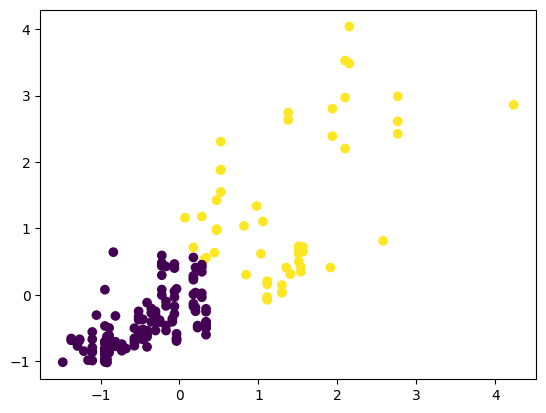

In [27]:
# Plot clusters

plt.scatter(charter['horsepower'], charter['price'], c=charter['cluster'])

# Cluster one looks to be mostly those that have one or both numbers above 1. There are some in cluster 1 that values below 1 both there are few.
# Both groups are similar in that there looks to be a positive correlation between price and horsepower
# Both groups are different in that group one is those with higher horsepower/price and group 0 is those with less

In [32]:
# Make loop to check for best value of k

ks = range(2,16)
s_scores = []
inertias = []

for k in ks:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(scaled_df)
  s_scores.append(silhouette_score(scaled_df, kmeans.labels_))
  inertias.append(kmeans.inertia_)


Text(0.5, 1.0, 'Silhos/k')

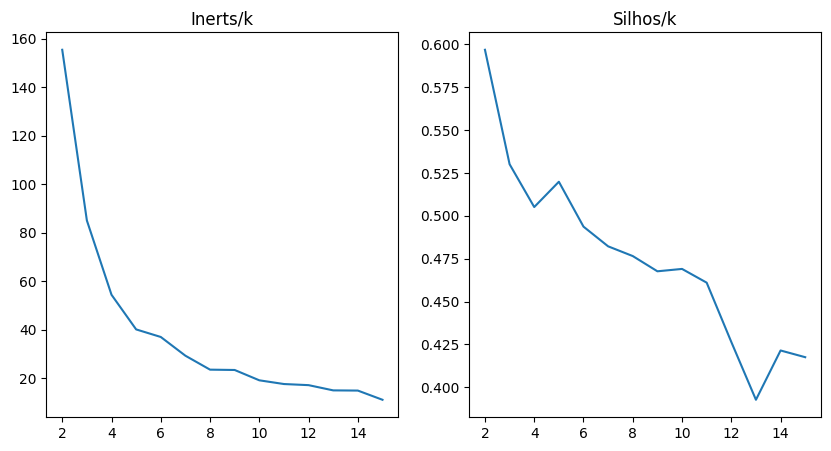

In [33]:
##Plot variables above to visualize best values of K

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].plot(ks, inertias)
axes[0].set_title('Inerts/k')

axes[1].plot(ks, s_scores)
axes[1].set_title('Silhos/k')

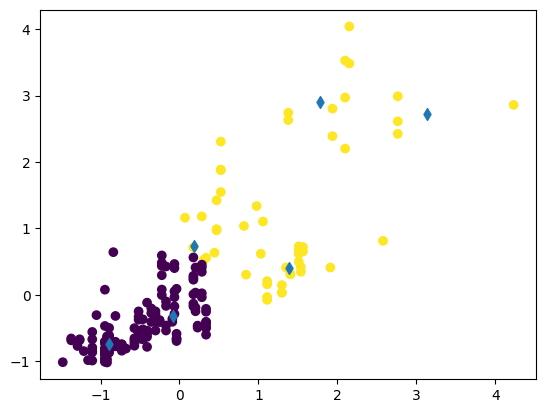

In [34]:
# add cluster centers to cluster plot above

kmeans6 = KMeans(n_clusters=6, random_state=42).fit(scaled_df)
plt.scatter(charter['horsepower'], charter['price'], c=charter['cluster'])
plt.scatter(kmeans6.cluster_centers_[:,0], kmeans6.cluster_centers_[:,1], marker='d')

In [35]:
# Generate DB Scan model -- first determine min sample and epsilon

# Determine distance between each point and the next three closest (4 neighbors means reference point plus three closest -- 4 neighbors)

min_samples = 4
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(scaled_df)
distances, indices = neighbors.kneighbors(scaled_df)
distances

array([[0.00000000e+00, 3.66629015e-02, 8.07151411e-02, 1.06192947e-01],
       [0.00000000e+00, 8.01089513e-02, 9.10661285e-02, 1.02962237e-01],
       [0.00000000e+00, 1.08311034e-01, 1.14930510e-01, 1.82673268e-01],
       [0.00000000e+00, 4.67045897e-02, 1.29068859e-01, 1.87211002e-01],
       [0.00000000e+00, 3.83386927e-02, 8.05692231e-02, 1.20477306e-01],
       [0.00000000e+00, 2.63864332e-02, 3.26689173e-02, 1.41178828e-01],
       [0.00000000e+00, 1.37417700e-01, 1.52036115e-01, 1.52365786e-01],
       [0.00000000e+00, 1.52036115e-01, 2.24418263e-01, 2.27886628e-01],
       [0.00000000e+00, 2.46693051e-01, 3.40348795e-01, 5.00357672e-01],
       [0.00000000e+00, 6.21965925e-02, 1.09699535e-01, 1.63597887e-01],
       [0.00000000e+00, 6.21965925e-02, 1.13032789e-01, 1.60204353e-01],
       [0.00000000e+00, 1.69627070e-02, 2.79577132e-01, 3.39050235e-01],
       [0.00000000e+00, 1.69627070e-02, 2.67200878e-01, 3.50311860e-01],
       [0.00000000e+00, 1.35020907e-01, 3.07146873e

In [36]:
# make array with furthest point from each datapoint above -- each row above is the distances to each point in the cluster, array below plots this out

n_th_neighbor = distances[:, min_samples -1]
n_th_neighbor

array([0.10619295, 0.10296224, 0.18267327, 0.187211  , 0.12047731,
       0.14117883, 0.15236579, 0.22788663, 0.50035767, 0.16359789,
       0.16020435, 0.33905024, 0.35031186, 0.4347479 , 0.70339119,
       0.55725634, 0.55725634, 0.32185911, 0.05403138, 0.04356538,
       0.02822743, 0.02362214, 0.07551546, 0.01683706, 0.00288994,
       0.0300614 , 0.10918957, 0.05423845, 0.19161576, 0.11172618,
       0.0541108 , 0.14582715, 0.07538981, 0.03442801, 0.05528586,
       0.05528586, 0.06492501, 0.05769412, 0.05339118, 0.11388162,
       0.12906886, 0.1281301 , 0.06869417, 0.06873038, 0.60340531,
       0.56403324, 1.53169819, 0.04660154, 0.01683706, 0.01294192,
       0.00326689, 0.02731413, 0.12231591, 0.13035247, 0.16243571,
       0.36604533, 0.05339118, 0.04619048, 0.08167229, 0.12564968,
       0.25090292, 0.1307637 , 0.24117688, 0.63436459, 0.33875154,
       0.42117773, 0.43022451, 0.75992928, 0.6110097 , 0.66226009,
       0.55788459, 1.07186586, 0.40987215, 0.02437604, 0.01181

In [37]:
# sort values for plotting

n_th_neighbors_sorted = np.sort(n_th_neighbor)
n_th_neighbors_sorted

array([0.00288994, 0.00288994, 0.00326689, 0.00326689, 0.01181107,
       0.01294192, 0.01683706, 0.01683706, 0.01683706, 0.02362214,
       0.02437604, 0.02673135, 0.02723686, 0.02731413, 0.02731413,
       0.02822743, 0.02822743, 0.02894322, 0.02929429, 0.02972231,
       0.0300614 , 0.0300614 , 0.0300614 , 0.03141242, 0.03141242,
       0.03275108, 0.03442801, 0.03581335, 0.03589723, 0.0376949 ,
       0.0402079 , 0.04356538, 0.04506962, 0.04523389, 0.04619048,
       0.04619048, 0.04660154, 0.04787253, 0.05144575, 0.05302417,
       0.05339118, 0.05339118, 0.05345635, 0.05401224, 0.05403138,
       0.0541108 , 0.05423845, 0.05423845, 0.05528586, 0.05528586,
       0.05769412, 0.05900959, 0.05955554, 0.06325782, 0.06325782,
       0.06325782, 0.06492501, 0.06533783, 0.06549657, 0.06760114,
       0.06869417, 0.06873038, 0.06893197, 0.06910732, 0.07538981,
       0.07551546, 0.07551546, 0.0773111 , 0.0773111 , 0.07891165,
       0.08009033, 0.08010895, 0.08022898, 0.08116969, 0.08137

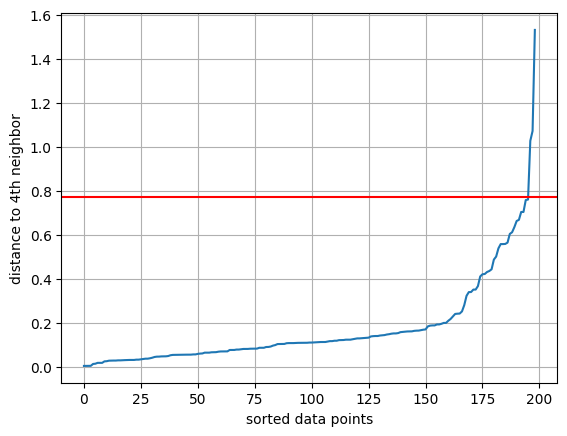

In [38]:
# Plot with epsilon to visualize

epsilon = .77
plt.plot(n_th_neighbors_sorted)
plt.ylabel(f'distance to {min_samples}th neighbor')
plt.xlabel('sorted data points')
plt.axhline(y=epsilon, color='r')
plt.grid()

In [42]:
#Elbow in plot looks to be .77 epsilon, will check percentiles to make sure

eps_perc = np.percentile(n_th_neighbors_sorted, [90, 95, 99])
print(eps_perc)

[0.43631271 0.61334519 1.02797876]


In [ ]:
# 95th percentile is epsion .61, will use this instead

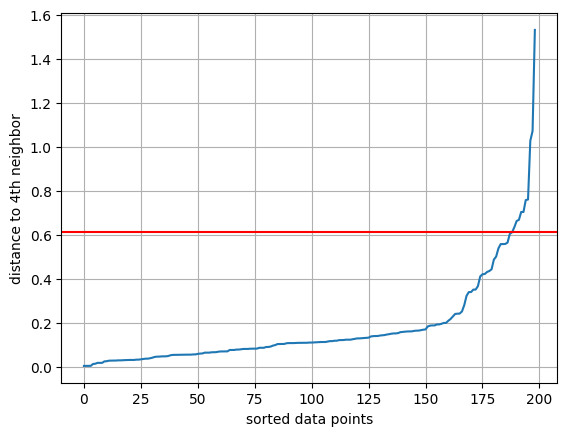

In [43]:
# Plot with epsilon at .61 to visualize

epsilon = .61
plt.plot(n_th_neighbors_sorted)
plt.ylabel(f'distance to {min_samples}th neighbor')
plt.xlabel('sorted data points')
plt.axhline(y=epsilon, color='r')
plt.grid()

In [44]:
# Create dbscan model

dbs = DBSCAN(eps=epsilon, min_samples=min_samples).fit(scaled_df)

In [45]:
# Check how many clusters there are

np.unique(dbs.labels_)

# there are three clusters -- -1 is noise, 0 and 1 are the others

array([-1,  0,  1])

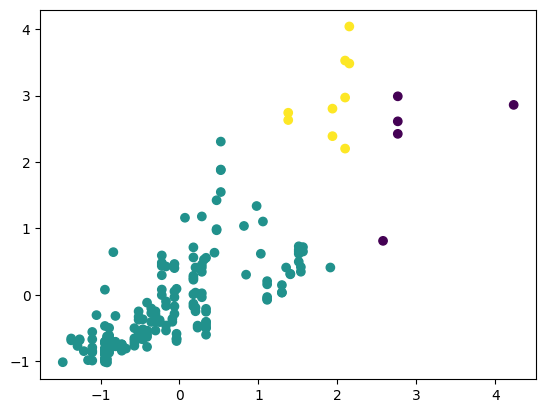

In [46]:
# Plot to visualize outliers

plt.scatter(scaled_df.iloc[:,0], scaled_df.iloc[:,1], c=dbs.labels_)